In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style='darkgrid')

from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# plt.rcParams['figure.figsize']=(6,4)
plt.figure(figsize=(6,4))
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라

<Figure size 600x400 with 0 Axes>

In [2]:
height=[100,110,120,130,140,150,160,170,180,190]
foot_size=[200,205,215,210,220,230,250,270,280,285]

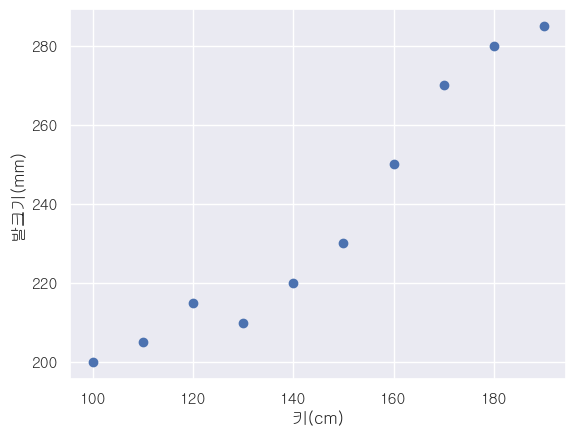

In [3]:
plt.scatter(height, foot_size)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')
plt.show()

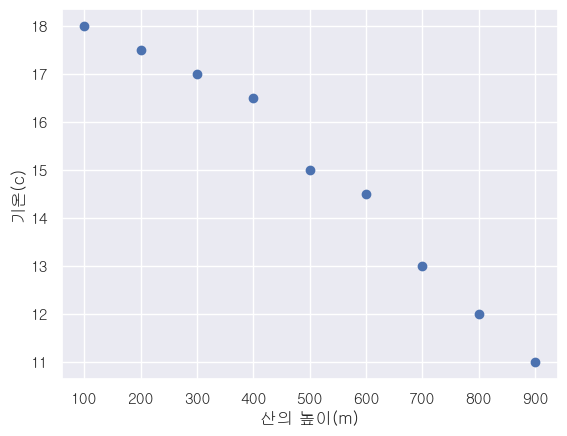

In [4]:
h=[100,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,14.5,13,12,11]
plt.scatter(h,t)
plt.xlabel('산의 높이(m)')
plt.ylabel('기온(c)')
plt.show()

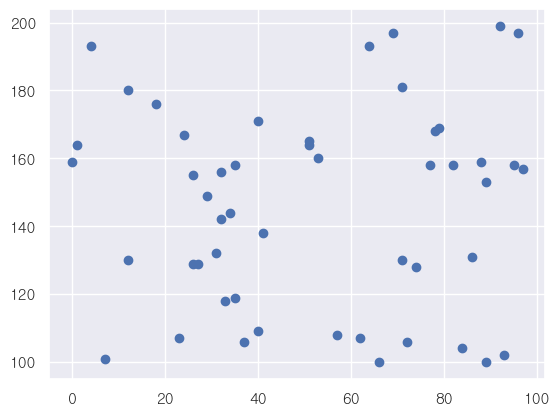

In [5]:
x1=np.random.randint(0,100,50)
x2=np.random.randint(100,200,50)
plt.scatter(x1, x2)
plt.show()

0.9648257243059098


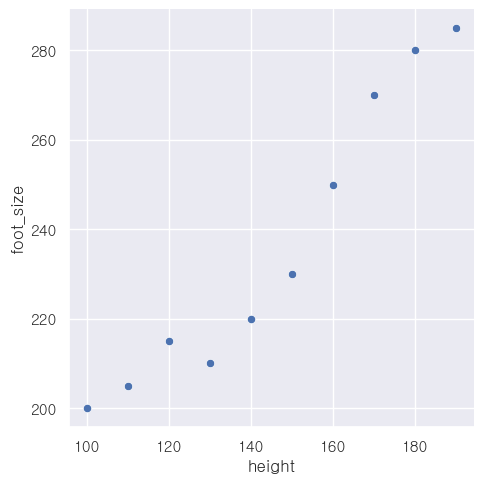

In [6]:
df=pd.DataFrame({'height':height, 'foot_size':foot_size})
print(df.height.corr(df.foot_size))
sns.relplot(x='height', y='foot_size', data=df)
plt.show()

-0.9879199164035133


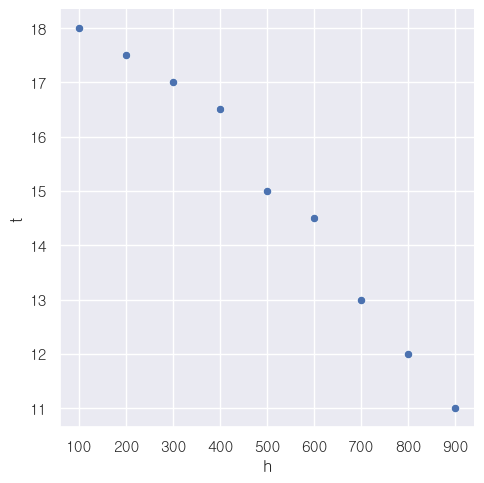

In [7]:
df1=pd.DataFrame({'h':h, 't':t})
print(df1.h.corr(df1.t))
sns.relplot(x='h', y='t', data=df1)
plt.show()

0.030990456258455312


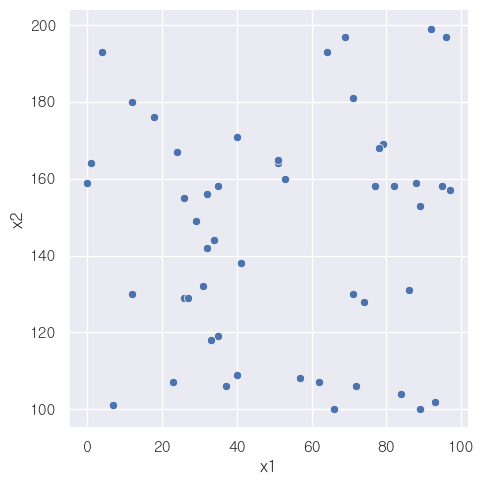

In [8]:
df2=pd.DataFrame({'x1':x1, 'x2':x2})
print(df2.x1.corr(df2.x2))
sns.relplot(x='x1', y='x2', data=df2)
plt.show()

In [9]:
tips=sns.load_dataset('tips')
print(tips.total_bill.corr(tips.tip))
# print(tips.total_bill.corr(tips.size))

0.6757341092113641


In [10]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
import math
def correlation(x, y):
    n=len(x)
    vals=range(n)
    x_sum=0.0
    y_sum=0.0
    x_sum_pow=0.0
    y_sum_pow=0.0
    mul_xy_sum=0.0

    for i in vals:
        mul_xy_sum=mul_xy_sum+float(x[i]) * float(y[i])
        x_sum=x_sum + float(x[i])
        y_sum=y_sum + float(y[i])
        x_sum_pow=x_sum_pow + pow(float(x[i]),2) 
        y_sum_pow=y_sum_pow + pow(float(y[i]),2) 


        try:
            r=((n*mul_xy_sum)-(x_sum*y_sum))/math.sqrt(((n*x_sum_pow)-pow(x_sum,2))*((n*y_sum_pow)-(pow(y_sum,2))))
        except:
            print("error")
            r=0.0
        return r

In [12]:
print(height)
print(foot_size)
print('상관관계분석:', correlation(height, foot_size))

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
[200, 205, 215, 210, 220, 230, 250, 270, 280, 285]
상관관계분석: 1.0


In [13]:
tips.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_1244\3825555837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [14]:
df['weight']=[25,30,38,35,40,45,50,55,68,70]
df.corr()

,height,foot_size,weight
height,1.000000,0.964826,0.974163
foot_size,0.964826,1.000000,0.979876
weight,0.974163,0.979876,1.000000


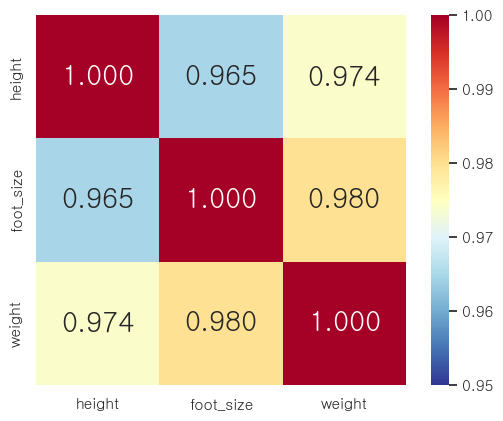

In [15]:
corr=df.corr()
df_heatmap=sns.heatmap(df.corr(),
                       cbar=True,
                       annot=True,
                       annot_kws={'size':20},
                       fmt='.3f',
                       square=True,
                       cmap='RdYlBu_r',
                       vmin=0.95, vmax=1
                       )

C:\Users\admin\AppData\Local\Temp\ipykernel_1244\1300211668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips_corr=tips.corr()
C:\Users\admin\AppData\Local\Temp\ipykernel_1244\1300211668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips_heatmap=sns.heatmap(tips.corr(),


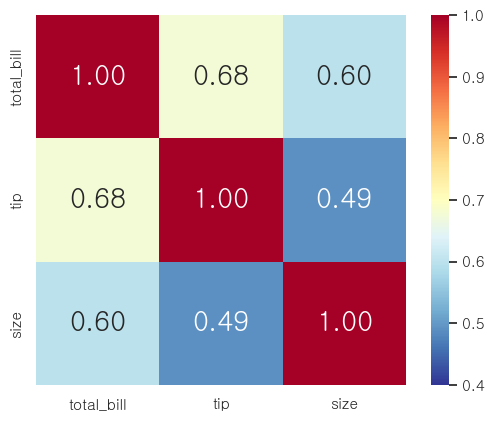

In [26]:
tips_corr=tips.corr()
tips_heatmap=sns.heatmap(tips.corr(),
                       cbar=True,
                       annot=True,
                       annot_kws={'size':20},
                       fmt='.2f',
                       square=True,
                       cmap='RdYlBu_r',
                       vmin=0.4, vmax=1
                       )

In [17]:
tips_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_1244\2898264279.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(tips_corr, dtype=np.bool)


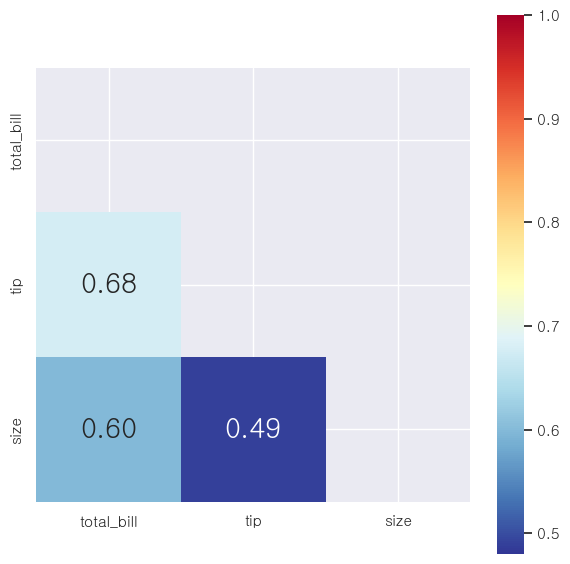

In [18]:
fig, ax=plt.subplots(figsize=(7,7))
mask=np.zeros_like(tips_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

df_heatmap=sns.heatmap(tips_corr,
                       cbar=True,
                       annot=True,
                       annot_kws={'size':20},
                       fmt='.2f',
                       square=True,
                       cmap='RdYlBu_r',
                       vmin=0.48, vmax=1,
                       mask=mask,
                       )

In [19]:
arr=np.ones(10)
arr2=np.zeros_like(tips_corr)
arr2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])